# M2 - EDA 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [2]:
mydata = pd.read_csv('CardioGoodFitness.csv')
mydata.shape

(180, 9)

In [3]:
mydata.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
mydata.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


In [5]:
mydata.describe(include = 'all').round(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.00,180,180.00,180,180.00,180.00,180.00,180.00
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.79,NaN,15.57,NaN,3.46,3.31,53719.58,103.19
std,NaN,6.94,NaN,1.62,NaN,1.08,0.96,16506.68,51.86
min,NaN,18.00,NaN,12.00,NaN,2.00,1.00,29562.00,21.00
25%,NaN,24.00,NaN,14.00,NaN,3.00,3.00,44058.75,66.00
50%,NaN,26.00,NaN,16.00,NaN,3.00,3.00,50596.50,94.00
75%,NaN,33.00,NaN,16.00,NaN,4.00,4.00,58668.00,114.75


In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B514348>,
      dtype=object)

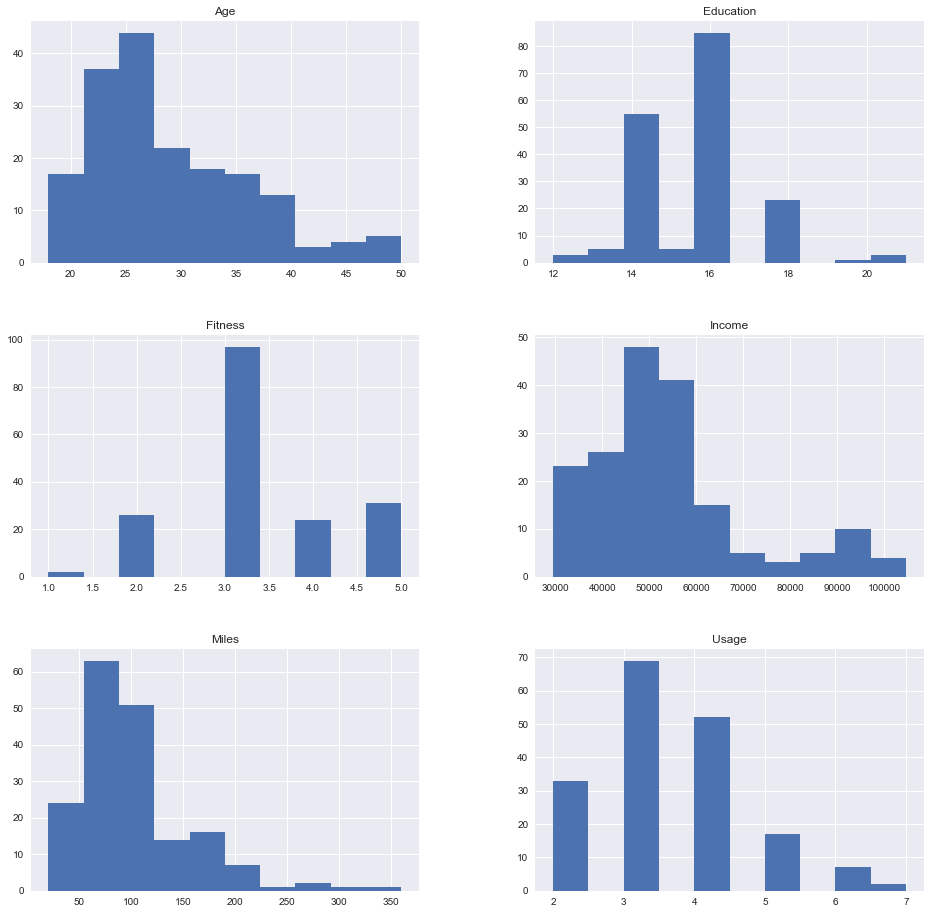

In [7]:
mydata.hist(figsize=(16, 16))

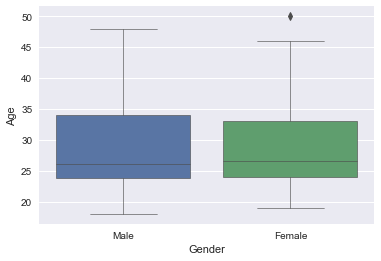

In [8]:
sns.boxplot(x="Gender", y="Age", data=mydata, linewidth = 0.6)

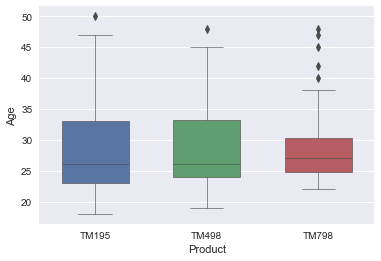

In [9]:
sns.boxplot(x="Product", y="Age", data=mydata, width = 0.6, linewidth = 0.6)

Age Desciption:
x(min) : 18
Q1     : 24.0
Q2     : 26.0
Q3     : 33.0
x(max) : 50


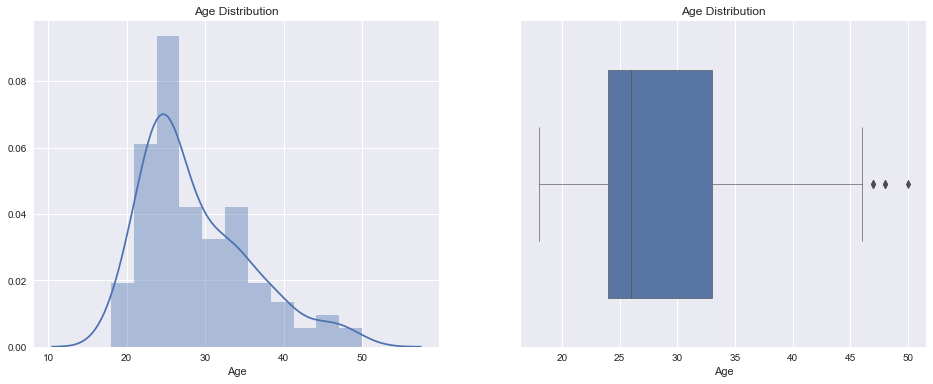

In [10]:
def summary(x):
    x_min = mydata[x].min()
    x_max = mydata[x].max()
    Q1 = mydata[x].quantile(0.25)
    Q2 = mydata[x].quantile(0.50)
    Q3 = mydata[x].quantile(0.75)
    print(f'{x.capitalize()} Desciption:\n'
          f'x(min) : {x_min}\n'
          f'Q1     : {Q1}\n'
          f'Q2     : {Q2}\n'
          f'Q3     : {Q3}\n'
          f'x(max) : {x_max}')

    fig = plt.figure(figsize=(16, 6))
    plt.subplot(121)
    ax1 = sns.distplot(mydata[x])
    plt.title(f'{x.capitalize()} Distribution')
    plt.subplot(122)
    ax2 = sns.boxplot(x=mydata[x], width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Distribution')
    plt.show()
    
summary('Age')

Income Desciption:
x(min) : 29562
Q1     : 44058.75
Q2     : 50596.5
Q3     : 58668.0
x(max) : 104581


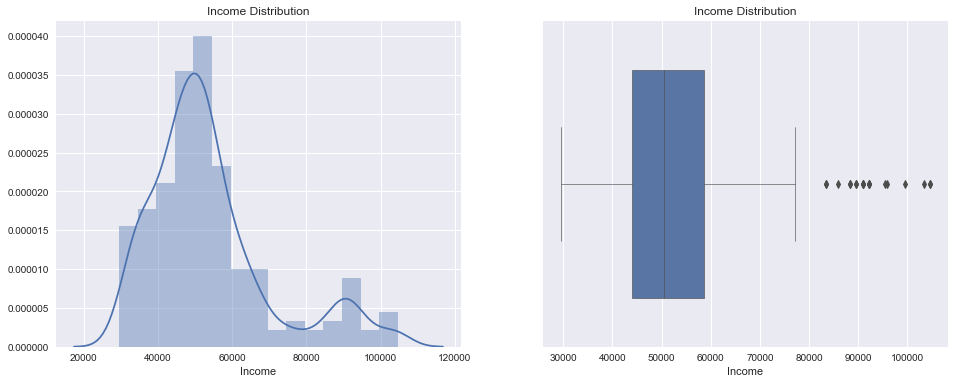

In [11]:
summary('Income')

In [12]:
pd.crosstab(mydata['Product'],mydata['Gender'] )

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


### Reference:
1. [Seaborn Hue and Hue order](https://stackoverflow.com/questions/48910557/ascending-order-of-bars-in-seaborn-barplot)

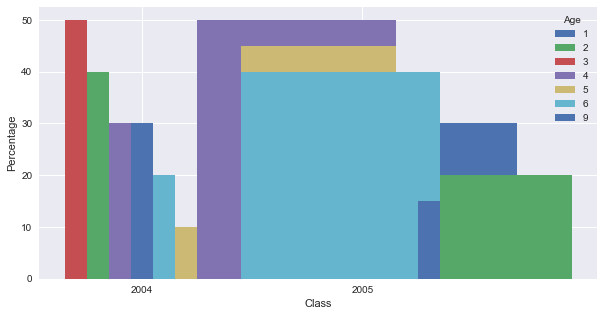

In [19]:
df = pd.DataFrame({"Class" : [2004]*6+[2005]*7,
                   "Age" : [3,2,4,6,5,1,2,3,6,4,5,1,9],
                   "Percentage" : [50,40,30,20,10,30,20,35,40,50,45,30,15]})

def sortedgroupedbar(ax, x,y, groupby, data=None, width=0.7, **kwargs):
    order = np.zeros(len(data))
    df = data.copy()
    for xi in np.unique(df[x].values):
        group = data[df[x] == xi]
        a = group[y].values
        b = sorted(np.arange(len(a)),key=lambda x:a[x],reverse=True)
        c = sorted(np.arange(len(a)),key=lambda x:b[x])
        order[data[x] == xi] = c   
    df["order"] = order
    u, df["ind"] = np.unique(df[x].values, return_inverse=True)
    step = width/len(np.unique(df[groupby].values))
    for xi,grp in df.groupby(groupby):
        ax.bar(grp["ind"]-width/2.+grp["order"]*step+step/2.,
               grp[y],width=step, label=xi, **kwargs)
    ax.legend(title=groupby)
    ax.set_xticks(np.arange(len(u)))
    ax.set_xticklabels(u)
    ax.set_xlabel(x)
    ax.set_ylabel(y)


fig, ax = plt.subplots(figsize=(10, 5))    
sortedgroupedbar(ax, x="Class",y="Percentage", groupby="Age", data=df)
plt.show()

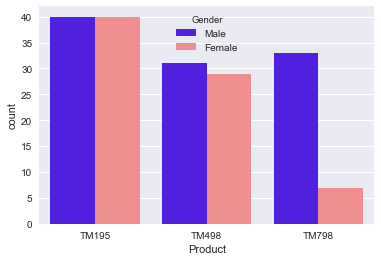

In [14]:
sns.countplot(x = 'Product', hue = 'Gender', palette = 'gnuplot2', data = mydata)

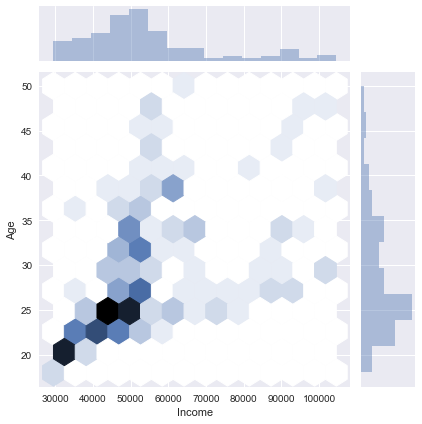

In [15]:
sns.jointplot(mydata['Income'], mydata['Age'], kind='hex')

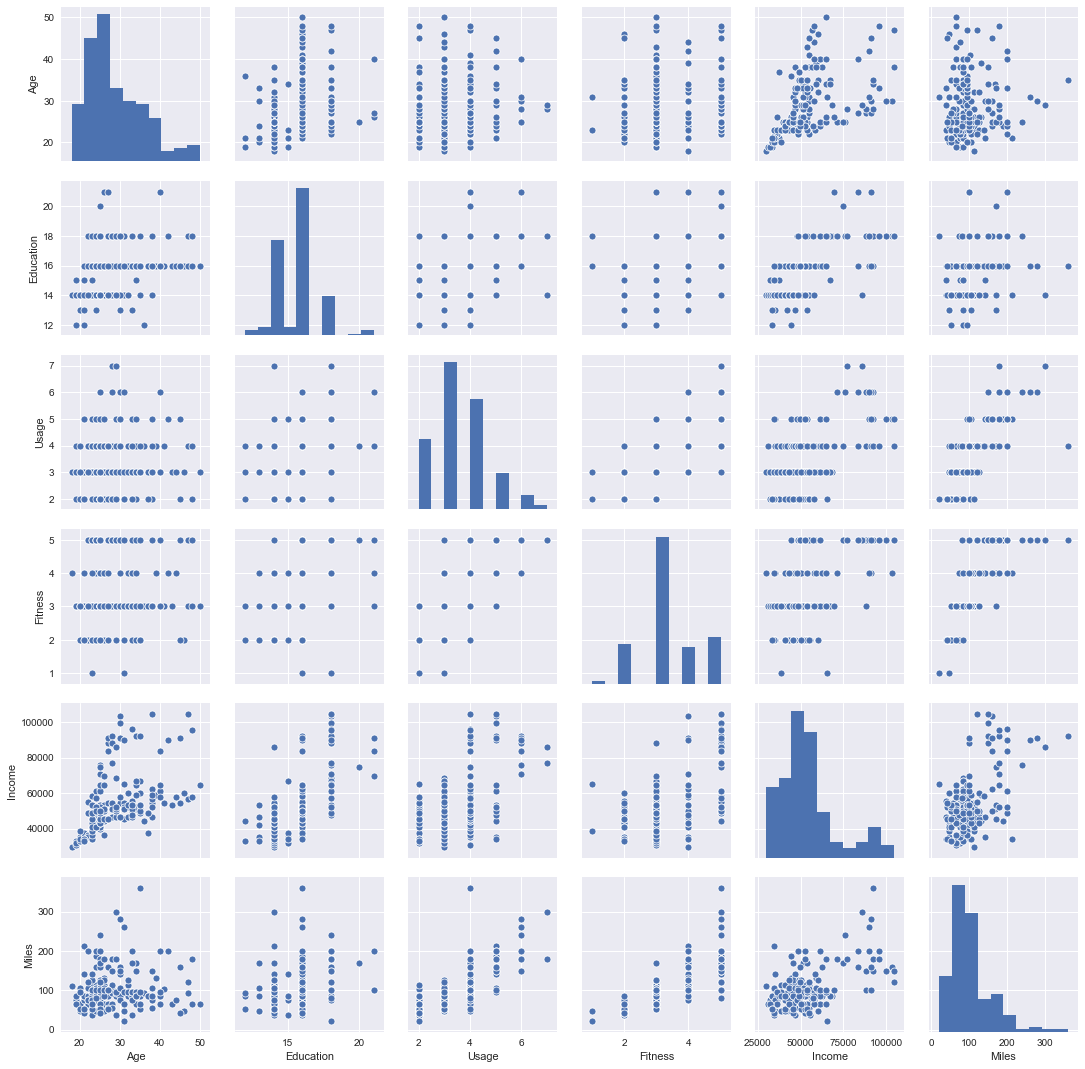

In [16]:
sns.pairplot(mydata)